In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.simplefilter('ignore', FutureWarning)

## Data Pre-Processing

In [2]:
#Testing for CVD, using max reduced csv file
heart_cvd = pd.read_csv('data/max_reduce.csv')
# Clean to columns needed
heart_cvd = heart_cvd[['SEX','AGE','SYSBP','CIGPDAY','BMI','TOTCHOL','DIABETES','BPMEDS','HEARTRTE','GLUCOSE','educ','CVD']]
heart_cvd.head()

,SEX,AGE,SYSBP,CIGPDAY,BMI,TOTCHOL,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,CVD
0,1,39,106.0,0.0,26.97,195.0,0,0.0,80.0,77.0,4.0,1
1,2,46,121.0,0.0,28.73,250.0,0,0.0,95.0,76.0,2.0,0
2,2,52,105.0,0.0,29.43,260.0,0,0.0,80.0,86.0,2.0,0
3,2,58,108.0,0.0,28.50,237.0,0,0.0,80.0,71.0,2.0,0
4,1,48,127.5,20.0,25.34,245.0,0,0.0,75.0,70.0,1.0,0


In [3]:
X = heart_cvd.drop("CVD", axis=1)
y = heart_cvd["CVD"]
print(X.shape, y.shape)

(9310, 11) (9310,)


In [4]:
X.head()

,SEX,AGE,SYSBP,CIGPDAY,BMI,TOTCHOL,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ
0,1,39,106.0,0.0,26.97,195.0,0,0.0,80.0,77.0,4.0
1,2,46,121.0,0.0,28.73,250.0,0,0.0,95.0,76.0,2.0
2,2,52,105.0,0.0,29.43,260.0,0,0.0,80.0,86.0,2.0
3,2,58,108.0,0.0,28.50,237.0,0,0.0,80.0,71.0,2.0
4,1,48,127.5,20.0,25.34,245.0,0,0.0,75.0,70.0,1.0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

Using TensorFlow backend.


# Create a Deep Learning Model

In [6]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=11))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
 - 1s - loss: 0.6620 - acc: 0.6525
Epoch 2/1000
 - 0s - loss: 0.5413 - acc: 0.7531
Epoch 3/1000
 - 0s - loss: 0.5046 - acc: 0.7581
Epoch 4/1000
 - 0s - loss: 0.4961 - acc: 0.7588
Epoch 5/1000
 - 0s - loss: 0.4938 - acc: 0.7579
Epoch 6/1000
 - 0s - loss: 0.4918 - acc: 0.7598
Epoch 7/1000
 - 0s - loss: 0.4906 - acc: 0.7594
Epoch 8/1000
 - 0s - loss: 0.4894 - acc: 0.7600
Epoch 9/1000
 - 0s - loss: 0.4890 - acc: 0.7597
Epoch 10/1000
 - 0s - loss: 0.4881 - acc: 0.7604
Epoch 11/1000
 - 0s - loss: 0.4877 - acc: 0.7588
Epoch 12/1000
 - 0s - loss: 0.4872 - acc: 0.7615
Epoch 13/1000
 - 0s - loss: 0.4865 - acc: 0.7602
Epoch 14/1000
 - 0s - loss: 0.4864 - acc: 0.7610
Epoch 15/1000
 - 0s - loss: 0.4858 - acc: 0.7601
Epoch 16/1000
 - 0s - loss: 0.4856 - acc: 0.7605
Epoch 17/1000
 - 0s - loss: 0.4852 - acc: 0.7610
Epoch 18/1000
 - 0s - loss: 0.4849 - acc: 0.7605
Epoch 19/1000
 - 0s - loss: 0.4845 - acc: 0.7618
Epoch 20/1000
 - 0s - loss: 0.4840 - acc: 0.7611
Epoch 21/1000
 - 0s - loss: 0

 - 0s - loss: 0.4592 - acc: 0.7743
Epoch 168/1000
 - 0s - loss: 0.4596 - acc: 0.7756
Epoch 169/1000
 - 0s - loss: 0.4585 - acc: 0.7741
Epoch 170/1000
 - 0s - loss: 0.4596 - acc: 0.7748
Epoch 171/1000
 - 0s - loss: 0.4591 - acc: 0.7741
Epoch 172/1000
 - 0s - loss: 0.4586 - acc: 0.7741
Epoch 173/1000
 - 0s - loss: 0.4602 - acc: 0.7724
Epoch 174/1000
 - 0s - loss: 0.4579 - acc: 0.7759
Epoch 175/1000
 - 0s - loss: 0.4588 - acc: 0.7734
Epoch 176/1000
 - 0s - loss: 0.4603 - acc: 0.7754
Epoch 177/1000
 - 0s - loss: 0.4583 - acc: 0.7747
Epoch 178/1000
 - 0s - loss: 0.4588 - acc: 0.7737
Epoch 179/1000
 - 0s - loss: 0.4582 - acc: 0.7738
Epoch 180/1000
 - 0s - loss: 0.4594 - acc: 0.7787
Epoch 181/1000
 - 0s - loss: 0.4589 - acc: 0.7761
Epoch 182/1000
 - 0s - loss: 0.4598 - acc: 0.7747
Epoch 183/1000
 - 0s - loss: 0.4595 - acc: 0.7761
Epoch 184/1000
 - 0s - loss: 0.4588 - acc: 0.7761
Epoch 185/1000
 - 0s - loss: 0.4590 - acc: 0.7756
Epoch 186/1000
 - 0s - loss: 0.4587 - acc: 0.7754
Epoch 187/1000


 - 0s - loss: 0.4549 - acc: 0.7751
Epoch 332/1000
 - 0s - loss: 0.4558 - acc: 0.7771
Epoch 333/1000
 - 0s - loss: 0.4554 - acc: 0.7766
Epoch 334/1000
 - 0s - loss: 0.4555 - acc: 0.7784
Epoch 335/1000
 - 0s - loss: 0.4556 - acc: 0.7757
Epoch 336/1000
 - 0s - loss: 0.4553 - acc: 0.7767
Epoch 337/1000
 - 0s - loss: 0.4558 - acc: 0.7777
Epoch 338/1000
 - 0s - loss: 0.4562 - acc: 0.7771
Epoch 339/1000
 - 0s - loss: 0.4541 - acc: 0.7764
Epoch 340/1000
 - 0s - loss: 0.4562 - acc: 0.7773
Epoch 341/1000
 - 0s - loss: 0.4559 - acc: 0.7773
Epoch 342/1000
 - 0s - loss: 0.4553 - acc: 0.7784
Epoch 343/1000
 - 0s - loss: 0.4562 - acc: 0.7754
Epoch 344/1000
 - 0s - loss: 0.4542 - acc: 0.7779
Epoch 345/1000
 - 0s - loss: 0.4555 - acc: 0.7776
Epoch 346/1000
 - 0s - loss: 0.4553 - acc: 0.7799
Epoch 347/1000
 - 0s - loss: 0.4552 - acc: 0.7779
Epoch 348/1000
 - 0s - loss: 0.4562 - acc: 0.7783
Epoch 349/1000
 - 0s - loss: 0.4541 - acc: 0.7769
Epoch 350/1000
 - 0s - loss: 0.4555 - acc: 0.7770
Epoch 351/1000


 - 0s - loss: 0.4529 - acc: 0.7797
Epoch 496/1000
 - 0s - loss: 0.4537 - acc: 0.7783
Epoch 497/1000
 - 0s - loss: 0.4527 - acc: 0.7766
Epoch 498/1000
 - 0s - loss: 0.4524 - acc: 0.7784
Epoch 499/1000
 - 0s - loss: 0.4542 - acc: 0.7777
Epoch 500/1000
 - 0s - loss: 0.4531 - acc: 0.7784
Epoch 501/1000
 - 0s - loss: 0.4527 - acc: 0.7766
Epoch 502/1000
 - 0s - loss: 0.4524 - acc: 0.7787
Epoch 503/1000
 - 0s - loss: 0.4533 - acc: 0.7791
Epoch 504/1000
 - 0s - loss: 0.4531 - acc: 0.7773
Epoch 505/1000
 - 0s - loss: 0.4539 - acc: 0.7783
Epoch 506/1000
 - 0s - loss: 0.4535 - acc: 0.7790
Epoch 507/1000
 - 0s - loss: 0.4523 - acc: 0.7779
Epoch 508/1000
 - 0s - loss: 0.4523 - acc: 0.7801
Epoch 509/1000
 - 0s - loss: 0.4537 - acc: 0.7771
Epoch 510/1000
 - 0s - loss: 0.4531 - acc: 0.7794
Epoch 511/1000
 - 0s - loss: 0.4528 - acc: 0.7784
Epoch 512/1000
 - 0s - loss: 0.4526 - acc: 0.7780
Epoch 513/1000
 - 0s - loss: 0.4533 - acc: 0.7790
Epoch 514/1000
 - 0s - loss: 0.4537 - acc: 0.7784
Epoch 515/1000


 - 0s - loss: 0.4498 - acc: 0.7800
Epoch 660/1000
 - 0s - loss: 0.4501 - acc: 0.7800
Epoch 661/1000
 - 0s - loss: 0.4500 - acc: 0.7799
Epoch 662/1000
 - 0s - loss: 0.4494 - acc: 0.7816
Epoch 663/1000
 - 0s - loss: 0.4505 - acc: 0.7810
Epoch 664/1000
 - 0s - loss: 0.4525 - acc: 0.7781
Epoch 665/1000
 - 0s - loss: 0.4508 - acc: 0.7791
Epoch 666/1000
 - 0s - loss: 0.4498 - acc: 0.7817
Epoch 667/1000
 - 0s - loss: 0.4490 - acc: 0.7830
Epoch 668/1000
 - 0s - loss: 0.4492 - acc: 0.7807
Epoch 669/1000
 - 0s - loss: 0.4505 - acc: 0.7796
Epoch 670/1000
 - 0s - loss: 0.4501 - acc: 0.7797
Epoch 671/1000
 - 0s - loss: 0.4498 - acc: 0.7793
Epoch 672/1000
 - 0s - loss: 0.4504 - acc: 0.7783
Epoch 673/1000
 - 0s - loss: 0.4505 - acc: 0.7806
Epoch 674/1000
 - 0s - loss: 0.4498 - acc: 0.7787
Epoch 675/1000
 - 0s - loss: 0.4499 - acc: 0.7794
Epoch 676/1000
 - 0s - loss: 0.4492 - acc: 0.7793
Epoch 677/1000
 - 0s - loss: 0.4493 - acc: 0.7796
Epoch 678/1000
 - 0s - loss: 0.4483 - acc: 0.7781
Epoch 679/1000


 - 0s - loss: 0.4465 - acc: 0.7820
Epoch 824/1000
 - 0s - loss: 0.4469 - acc: 0.7791
Epoch 825/1000
 - 0s - loss: 0.4475 - acc: 0.7804
Epoch 826/1000
 - 0s - loss: 0.4469 - acc: 0.7797
Epoch 827/1000
 - 0s - loss: 0.4471 - acc: 0.7797
Epoch 828/1000
 - 0s - loss: 0.4468 - acc: 0.7809
Epoch 829/1000
 - 0s - loss: 0.4505 - acc: 0.7747
Epoch 830/1000
 - 0s - loss: 0.4478 - acc: 0.7807
Epoch 831/1000
 - 0s - loss: 0.4462 - acc: 0.7800
Epoch 832/1000
 - 0s - loss: 0.4479 - acc: 0.7824
Epoch 833/1000
 - 0s - loss: 0.4484 - acc: 0.7819
Epoch 834/1000
 - 0s - loss: 0.4471 - acc: 0.7801
Epoch 835/1000
 - 0s - loss: 0.4473 - acc: 0.7767
Epoch 836/1000
 - 0s - loss: 0.4473 - acc: 0.7790
Epoch 837/1000
 - 0s - loss: 0.4521 - acc: 0.7784
Epoch 838/1000
 - 0s - loss: 0.4493 - acc: 0.7794
Epoch 839/1000
 - 0s - loss: 0.4482 - acc: 0.7764
Epoch 840/1000
 - 0s - loss: 0.4486 - acc: 0.7769
Epoch 841/1000
 - 0s - loss: 0.4480 - acc: 0.7807
Epoch 842/1000
 - 0s - loss: 0.4487 - acc: 0.7801
Epoch 843/1000


 - 0s - loss: 0.4462 - acc: 0.7807
Epoch 988/1000
 - 0s - loss: 0.4460 - acc: 0.7748
Epoch 989/1000
 - 0s - loss: 0.4456 - acc: 0.7796
Epoch 990/1000
 - 0s - loss: 0.4464 - acc: 0.7790
Epoch 991/1000
 - 0s - loss: 0.4475 - acc: 0.7791
Epoch 992/1000
 - 0s - loss: 0.4458 - acc: 0.7781
Epoch 993/1000
 - 0s - loss: 0.4463 - acc: 0.7793
Epoch 994/1000
 - 0s - loss: 0.4464 - acc: 0.7783
Epoch 995/1000
 - 0s - loss: 0.4465 - acc: 0.7807
Epoch 996/1000
 - 0s - loss: 0.4467 - acc: 0.7784
Epoch 997/1000
 - 0s - loss: 0.4449 - acc: 0.7810
Epoch 998/1000
 - 0s - loss: 0.4465 - acc: 0.7804
Epoch 999/1000
 - 0s - loss: 0.4465 - acc: 0.7781
Epoch 1000/1000
 - 0s - loss: 0.4465 - acc: 0.7794


## Quantify our Trained Model

In [8]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.5527195183886695, Accuracy: 0.7401202751189163


In [9]:
encoded_predictions = model.predict_classes(X_test_scaled[:50])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

/Users/ken_r/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [10]:
prediction_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [11]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:50])}")

Predicted classes: [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual Labels: [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]


# Saving a Trained Model
We can save our trained models using the HDF5 binary format with the extension `.h5`

In [12]:
# Save the model
model.save("framingham_cvd.h5")

# Loading a Model

In [13]:
# Load the model
from keras.models import load_model
cvd_model = load_model("framingham_cvd.h5")

## Evaluating the loaded model

In [14]:
model_loss, model_accuracy = cvd_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.5527195183886695, Accuracy: 0.7401202751189163


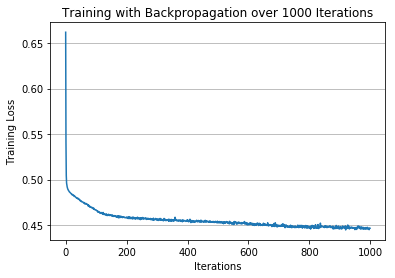

In [15]:
# loss is sum of error on training set
# error should decrease over epochs, steeper the better
plt.plot(history.history['loss'])
plt.title('Training with Backpropagation over 1000 Iterations')
plt.ylabel('Training Loss')
plt.xlabel('Iterations')
plt.grid(axis='y')

In [ ]:
# Testing Data Paths
X_testing_data = os.path.join("data/" "cvd_test.csv")

In [ ]:
# Read the testing data
X_testNew_df = pd.read_csv(X_testing_data, delimiter=",", skiprows=1, header=None)
X_testNew = X_testNew_df.values
X_testNew.shape

In [ ]:
# Grab just one data point to test with
test = np.expand_dims(X_testNew[0], axis=0)
test.shape

In [ ]:
# Make a prediction. The result should be 0 - no CVD
print(f"Predicted class: {model.predict_classes(test)}")

In [ ]:
# Grab just one data point to test with
test2 = np.expand_dims(X_testNew[1], axis=0)
test2.shape

In [ ]:
# Make a prediction. The result should be 1 - CVD
print(f"Predicted class: {model.predict_classes(test2)}")

In [ ]:
# Grab just one data point to test with
test3 = np.expand_dims(X_testNew[2], axis=0)
test3.shape

In [ ]:
# Make a prediction. The result should be 1 - CVD
print(f"Predicted class: {model.predict_classes(test3)}")

In [ ]:
# Grab just one data point to test with
test4 = np.expand_dims(X_testNew[14], axis=0)
test4.shape

In [ ]:
# Make a prediction. The result should be 0 - no CVD
print(f"Predicted class: {model.predict_classes(test4)}")

In [ ]:
corr = 0
wron = 0

for index, row in test_df.iterrows():
    if row['predicted'] == row['actual']:
        corr = corr + 1
    else:
        wron = wron + 1
        
print(f'Correct predictions: {corr}')
print(f'Incorrect predictions: {wron}')